# Relative Abundance Plots by Age

Date created: 12/3/2024

This notebook plots the following:

- 16S V4 relative abundance plots at Genus taxon level by Age


In [3]:
# Import Python packages
import pandas as pd
import numpy as np
import biom
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import os
from matplotlib.colors import ListedColormap
from matplotlib.colors import to_rgba

In [4]:
# Define the taxa level
taxa_level = 'Genus'

In [5]:
# Load the metadata
metadata_path = '../Data/Metadata/updated_clean_ant_skin_metadata.tab'
metadata = pd.read_csv(metadata_path, sep='\t')
metadata['case_type'].value_counts()

case_type
case-nonlesional skin       111
case-anterior nares         108
case-lesional skin          107
control-anterior nares       89
control-nonlesional skin     87
Name: count, dtype: int64

In [18]:
# Define paths to the collapsed taxa tables
biom_paths = {
    '16S_V4': '../Data/Tables/Relative_Abundance_Tables/df_16S_filtered_feature_table_rare_Genus_relative_abundance.biom'
}

In [7]:
# Predefined color palette for specific families
if taxa_level == "Genus":
    taxa_colors = {
        ' g__Cutibacterium': '#ffa505',  # Bright orange
        ' g__Staphylococcus': '#92f0f0',      # Fluorescent light blue
        ' g__Streptococcus': '#FF0000',    # Red
        ' g__Corynebacterium': '#ffe59a',        # Pastel yellow
        ' g__Lawsonella': '#70a8dc',         # Light blue
        ' g__Veillonella': '#c5bce0',         # Pastel purplish
        ' g__Micrococcus':'#f4cccd',           # Pastel yellow
        ' g__Alloprevotella': '#bcbcbc',        # Light gray
        ' g__Lactobacillus': '#daead3',     # Pale mint green
        ' g__Neisseria': '#f6475f',         # Redish pink
        'Others': '#ededed'                 # White
    }

In [8]:
# A list of unique colors to use for taxa not predefined
unique_colors = sns.color_palette("deep", n_colors=20).as_hex()
unique_color_iter = cycle(unique_colors)  # Iterator to cycle through unique colors

In [17]:
# Function to load BIOM table, collapse by taxa, sort rows by row sum, remove specified samples, and convert to relative abundance
def load_biom_table(biom_path, metadata_path):
    # Load metadata as a DataFrame from the file path
    metadata = pd.read_csv(metadata_path, sep='\t')

    # Load BIOM table and convert to a DataFrame
    table = biom.load_table(biom_path)
    df = pd.DataFrame(table.matrix_data.toarray(),
                      index=table.ids(axis='observation'),
                      columns=table.ids(axis='sample'))
    
    # Sort rows by row sum in descending order
    df['row_sum'] = df.sum(axis=1)
    df = df.sort_values(by='row_sum', ascending=False)
    
    # Drop the 'row_sum' column before proceeding
    df = df.drop(columns=['row_sum'])

    # Replace ' g__' rows with ' g__Unknown'
    df.index = df.index.map(lambda x: ' g__Unknown' if x == ' g__' else x)
    
    return df

    


In [15]:
# Function to determine the top 15 families and collapse the rest as "Others"
def collapse_top_15(df):
    top_genera = df.sum(axis=1).nlargest(15).index  # Select top 15 families
    df_top = df.loc[top_genera]
    df_top.loc['Others'] = df.loc[~df.index.isin(top_genera)].sum()
    return df_top


In [16]:
# Function to get or assign colors to families
def get_taxa_colors(families, global_taxa_color_map):
    for taxa in families:
        if taxa not in global_taxa_color_map:
            if taxa in taxa_colors:
                global_taxa_color_map[taxa] = taxa_colors[taxa]
            else:
                global_taxa_color_map[taxa] = next(unique_color_iter)  # Assign a new unique color
    return global_taxa_color_map

## Relative abundance plots

In [126]:
# Orders the samples by relative abundance of streptococcus
sorted_index = df.loc[' g__Streptococcus'].sort_values(ascending=False).index
df[sorted_index]


,900246,900142,900444,900288,900069,900092,900505,900466,900134,900365,...,900117,900084,900431,900392,900088,900308,900548,900227,900606,900122
g__Streptococcus,0.996000,0.991333,0.985333,0.983333,0.983333,0.973333,0.972000,0.971667,0.971638,0.963000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
g__Staphylococcus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007000,0.001000,0.001335,0.006333,...,0.576667,0.184333,0.994000,0.998333,0.797667,0.974000,0.868333,0.317211,0.002333,0.975333
g__Haemophilus_D_734546,0.000000,0.002333,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,0.000000
g__Unknown,0.000667,0.004333,0.003333,0.001667,0.005000,0.006667,0.005667,0.000333,0.002336,0.009000,...,0.002000,0.227000,0.001333,0.000000,0.003333,0.003667,0.037333,0.466978,0.365000,0.003000
g__Corynebacterium,0.000333,0.000000,0.000000,0.000667,0.005333,0.015333,0.001000,0.000333,0.011345,0.004000,...,0.325333,0.338000,0.000000,0.000000,0.174333,0.000000,0.042333,0.005337,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g__Pseudomonas_K,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
g__Herbaspirillum,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
g__Marinomonas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
g__Tetragenococcus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
def plot_relative_abundance(df, metadata_subset, group_column, output_dir, key, taxa_color_map):
    # Reorder the columns
    desired_order = ['control-nonlesional skin','case-nonlesional skin', 'case-lesional skin', 'control-anterior nares', 'case-anterior nares']
    for group in desired_order: # metadata[group_column].unique():
        # filter df to the rows with a specific group
        df_filtered = df.loc[:, metadata_subset[group_column] == group]

        print(group)
        
        # Create output file paths
        output_png_file = os.path.join(output_dir, f'By_Age_{key}_{taxa_level}_{group}_relative_abundance_plot.png')  # Save as png
        output_svg_file = os.path.join(output_dir, f'By_Age_{key}_{taxa_level}_{group}_relative_abundance_plot.svg')  # Save as svg
        
        # Set plot title based on key
        if key == '16S_V4':
            plot_title = f'16S rRNA (V4) Relative Abundance for {group} sorted by Age'

        # Plot
        ax = df_filtered.T.plot(kind='bar', stacked=True, figsize=(13, 10),
                            width=0.8,  # Bars closer together
                            color=[taxa_color_map.get(fam, '#ADD8E6') for fam in df_filtered.index])

        plt.ylabel('Relative Abundance', fontsize=16)
        plt.xlabel(' ')
        plt.title(plot_title, fontsize=18)

        # Set x-axis labels and sample size retained after rarefaction for V1-V3 and V4
        if key == '16S_V4':
            new_labels = ['Healthy skin','AD NL skin', 'AD L skin', 'Healthy anterior nares', 'AD anterior nares']

        # Set the new x-tick labels
        # plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45, ha='center', fontsize=16)

        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14, title=taxa_level, title_fontsize=16)
        plt.tight_layout()

        plt.savefig(output_png_file, format='png', dpi=600)  # Save as png
        plt.savefig(output_svg_file, format='svg')  # Save as svg
        plt.show()

        plt.close()


control-nonlesional skin


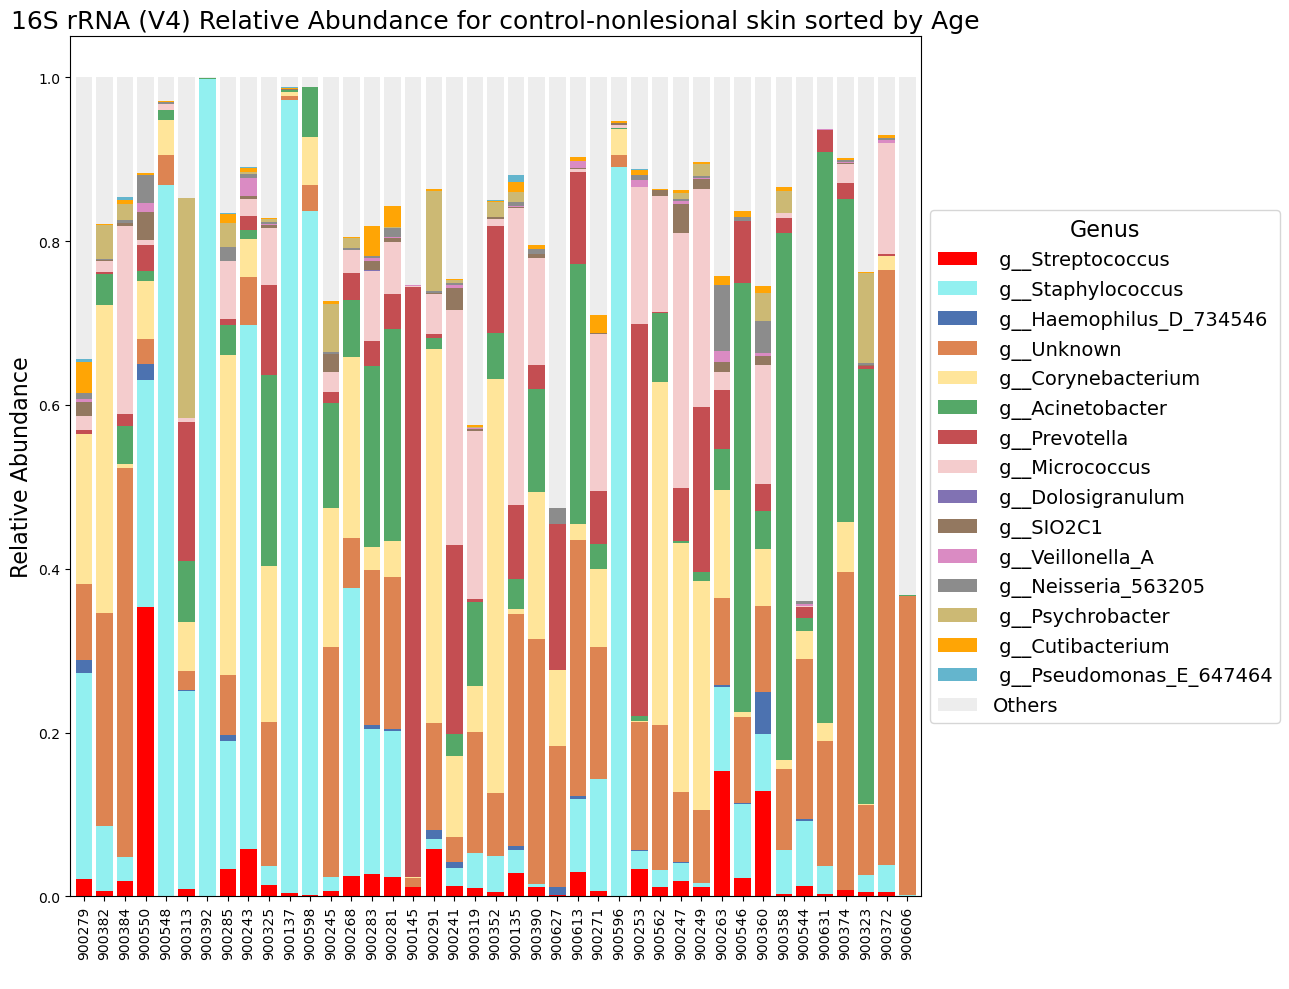

case-nonlesional skin


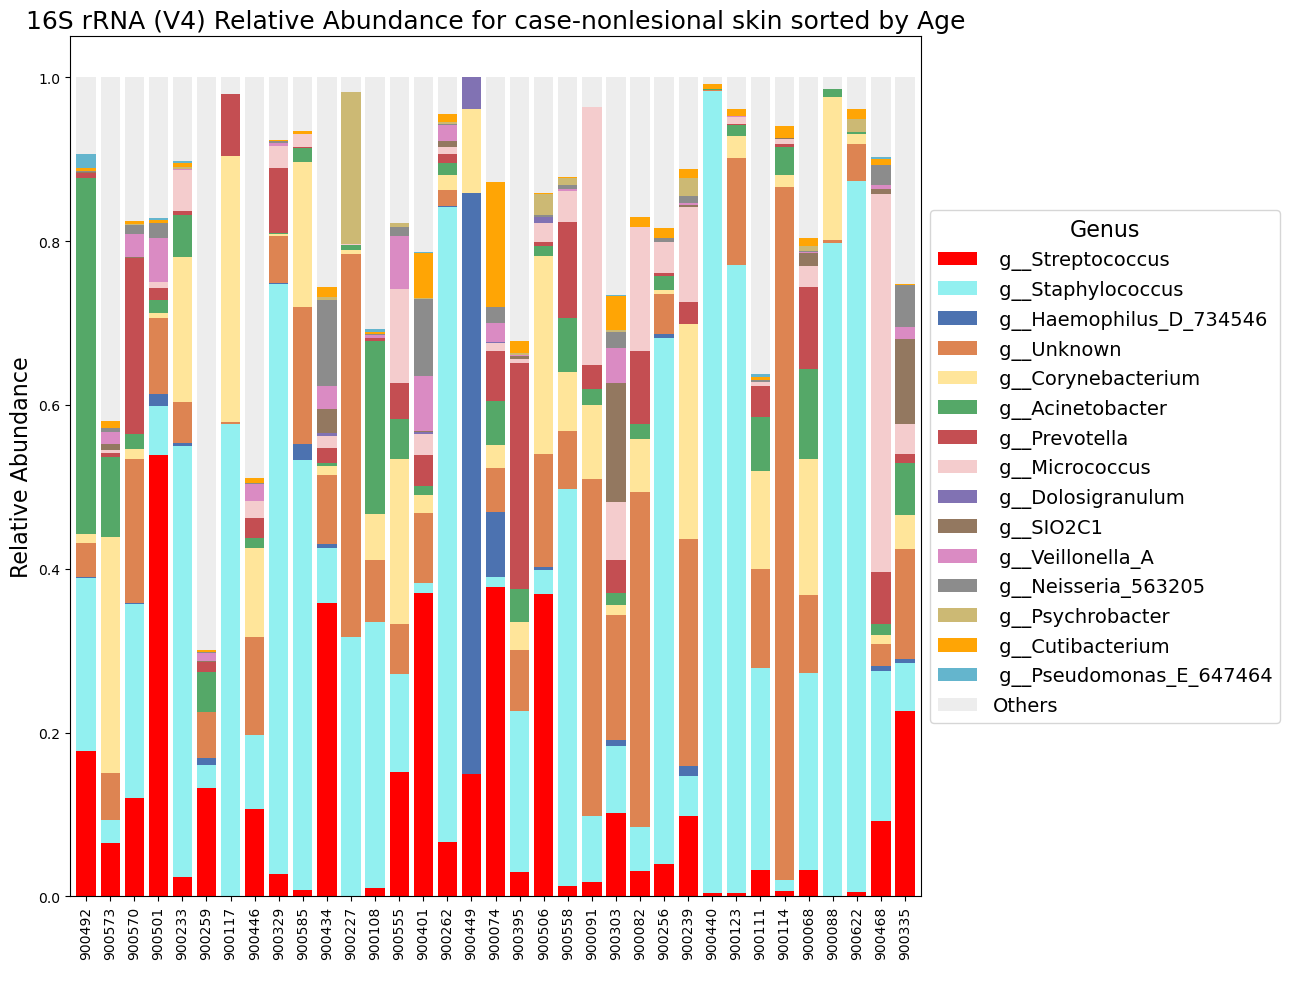

case-lesional skin


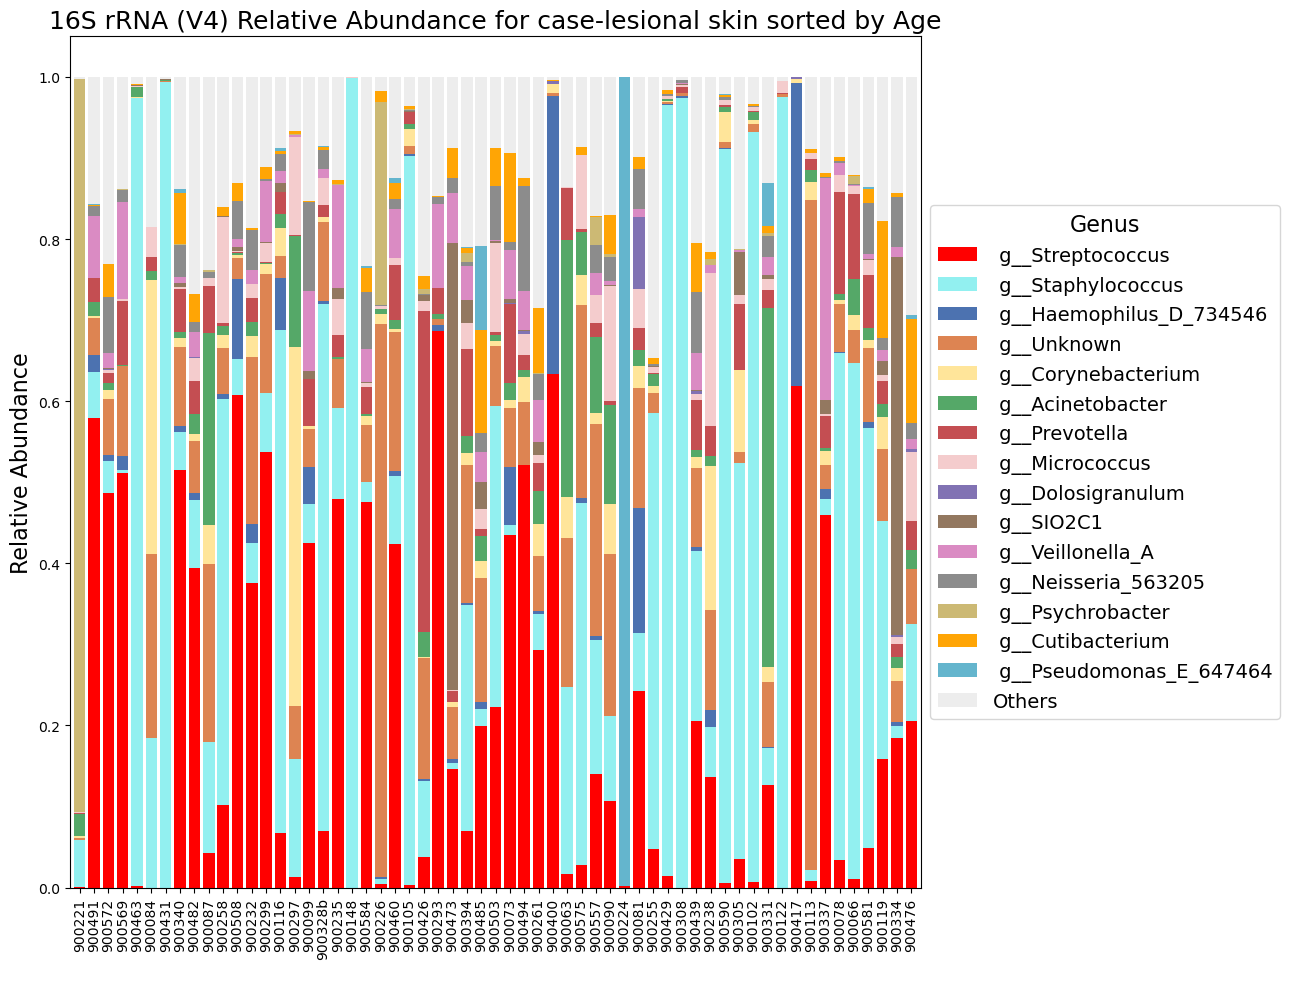

control-anterior nares


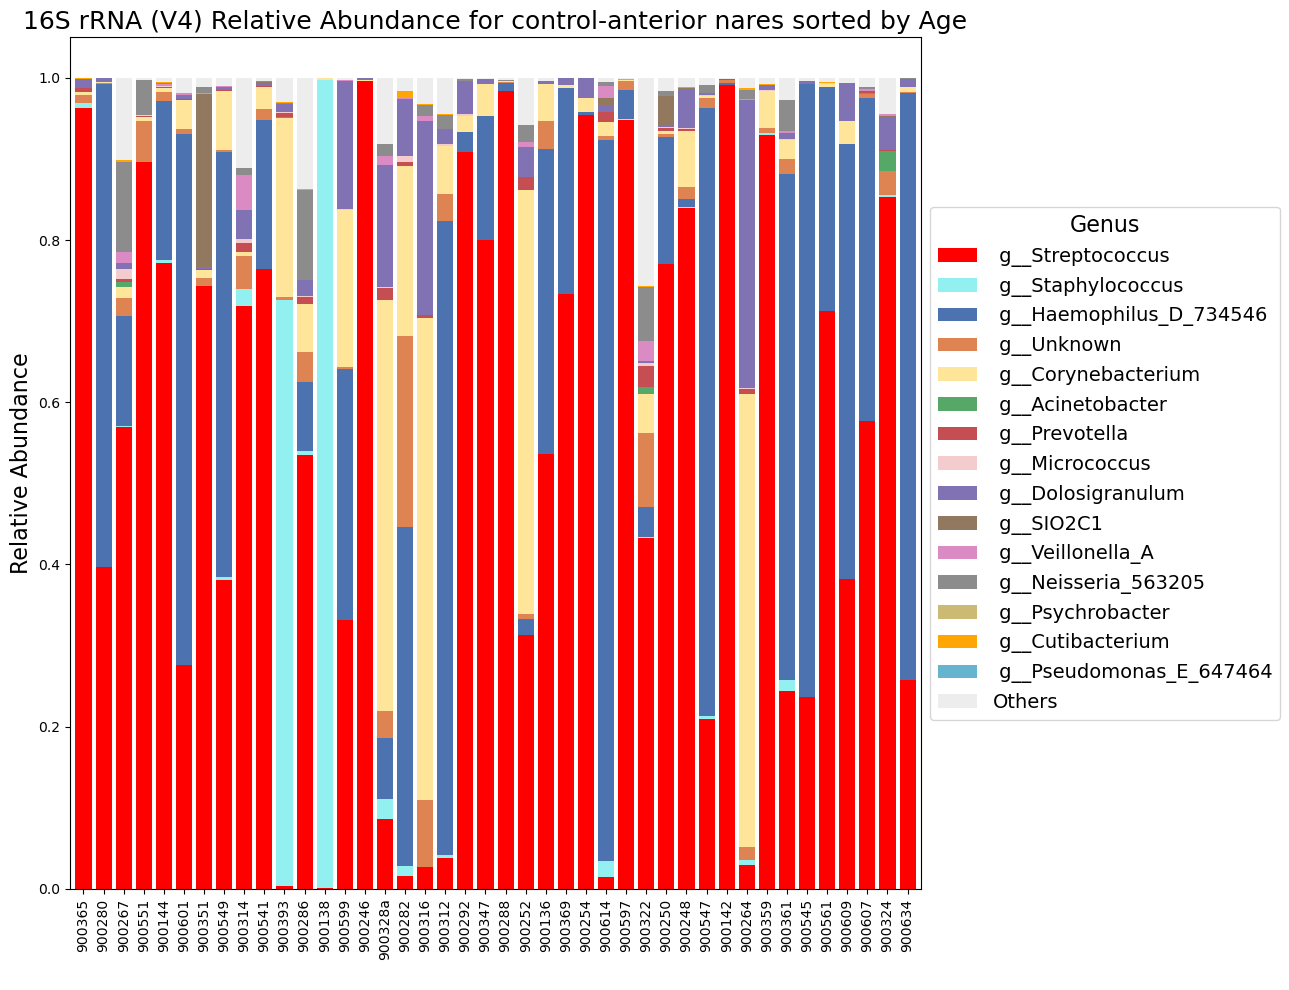

case-anterior nares


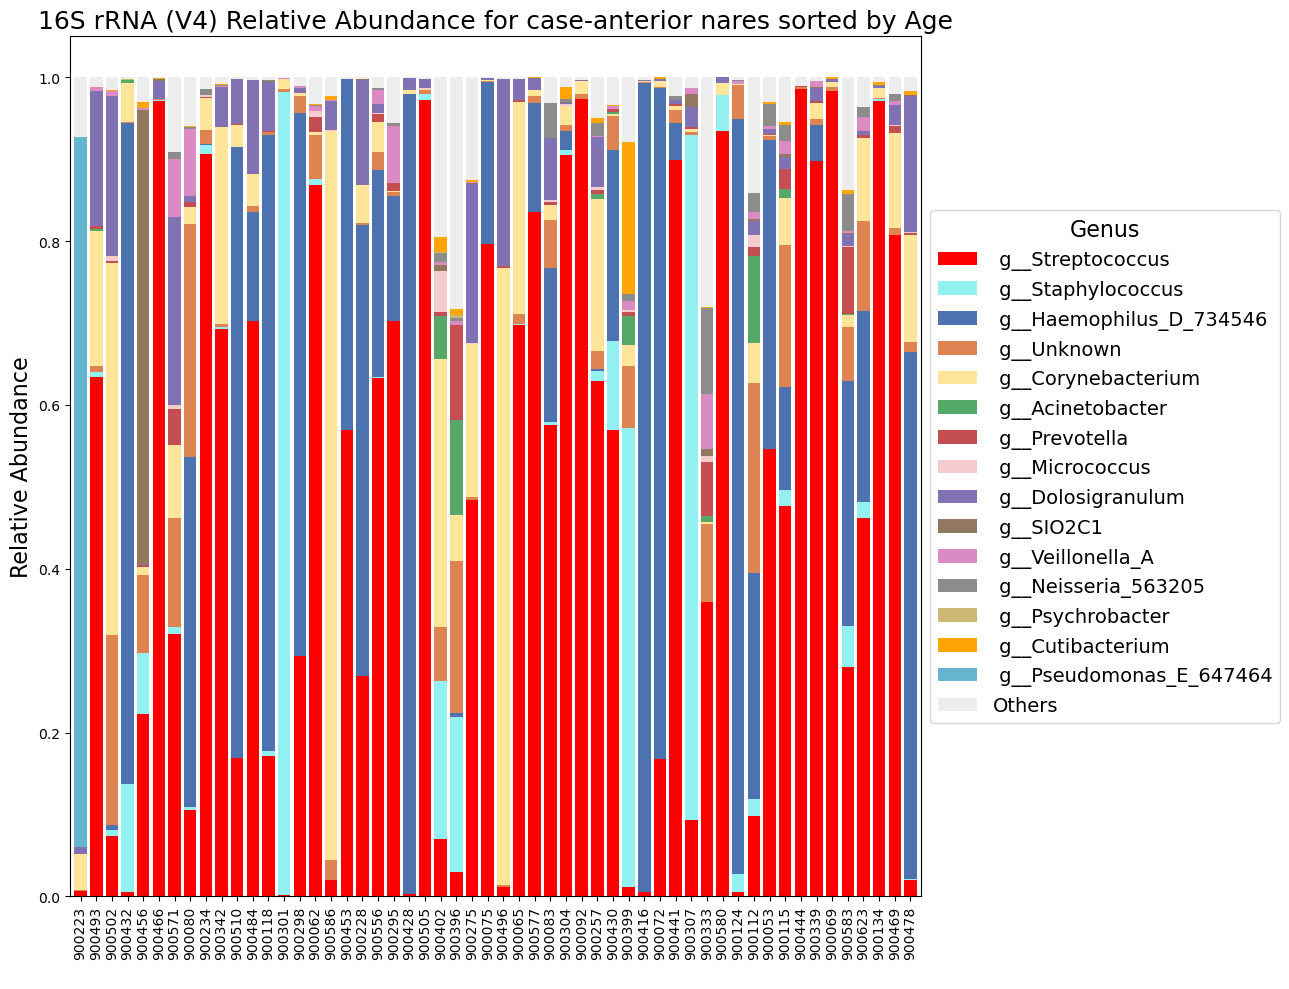

In [67]:
# Process both BIOM files
global_taxa_color_map = {}  # Store colors assigned to families across both datasets
for key, biom_path in biom_paths.items():
    # Load and process the BIOM table
    df = load_biom_table(biom_path, metadata_path)

    # Keep only the columns in df that have matching entries in the metadata
    df = df[df.columns.intersection(metadata['#sample-id'])]

    df_top_15 = collapse_top_15(df)  # Now using the top 15 function
    
    # Define the output directory for the current key
    output_dir = '../Plots/Analysis_figures/Relative_Abundance/'
    os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

    # Merge with metadata
    metadata_subset = metadata.set_index('#sample-id').loc[df.columns]  # Assuming #sample-id in metadata matches samples in BIOM table
    
    #metadata_subset.loc[metadata_subset['age_months'].sort_values().index]
    # Drop rows with missing age_months drops NaN
    metadata_subset = metadata_subset.dropna(subset=['age_months'])

    # Drop rows with non-numeric age_months 
    metadata_subset = metadata_subset[metadata_subset['age_months'].str.isnumeric()]

    # Convert age_months to float
    metadata_subset['age_months'] = metadata_subset['age_months'].astype(float)

    # Sort by age_months    
    metadata_subset = metadata_subset.sort_values(by='age_months')
    
    # Subset df to the columns in metadata_subset
    df_top_15 = df_top_15[metadata_subset.index]

    # Generate or retrieve colors for the top families in this dataset
    global_taxa_color_map = get_taxa_colors(df_top_15.index, global_taxa_color_map)
    
    # Plot the results and save in the respective folder 
    plot_relative_abundance(df_top_15, metadata_subset, 'case_type', output_dir, key, global_taxa_color_map)
    #def plot_relative_abundance(df, metadata, group_column, output_dir, key, taxa_color_map):
    